In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data='Churn_Modelling.csv'
test_data='test.csv'
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)


In [3]:
train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
print(train['Geography'].unique())


['France' 'Spain' 'Germany']


In [6]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember']
train_df=train
for col in categorical_columns:
    train_df[col], uniques = pd.factorize(train_df[col])

In [7]:
train_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,0,0,0,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,0,1,0,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,1,0,1,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,0,0,0,79084.10,0


In [8]:
train_df.isnull

<bound method DataFrame.isnull of       RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          1       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          1       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          2       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    B

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

In [10]:
# Define feature columns and target
feature_columns = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
target_column =  'Exited'

# Split the data into train and validation sets
X = train_df[feature_columns]
y = train_df[target_column]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
#categorical_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

print(preprocessor)

ColumnTransformer(transformers=[('num', SimpleImputer(),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Geography', 'Gender', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember'])])


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=300, random_state=10)

# Create and evaluate the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_pipeline.predict(X_val)

# Evaluate the model
rf_accuracy = accuracy_score(y_val, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print('Random Forest Classification Report:')
print(classification_report(y_val, rf_y_pred))


Random Forest Accuracy: 0.8710
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.77      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [12]:
from sklearn.ensemble import AdaBoostClassifier

# Define the model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
ada_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', ada_model)])

# Train the model
ada_pipeline.fit(X_train, y_train)

# Make predictions
ada_y_pred = ada_pipeline.predict(X_val)

# Evaluate the model
ada_accuracy = accuracy_score(y_val, ada_y_pred)
print(f'AdaBoost Accuracy: {ada_accuracy:.4f}')
print('AdaBoost Classification Report:')
print(classification_report(y_val, ada_y_pred))


/home/vivek/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8590
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', gb_model)])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_pipeline.predict(X_val)

# Evaluate the model
gb_accuracy = accuracy_score(y_val, gb_y_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.4f}')
print('Gradient Boosting Classification Report:')
print(classification_report(y_val, gb_y_pred))


Gradient Boosting Accuracy: 0.8635
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [14]:
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create and evaluate the pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_pipeline.predict(X_val)

# Evaluate the model
xgb_accuracy = accuracy_score(y_val, xgb_y_pred)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')
print('XGBoost Classification Report:')
print(classification_report(y_val, xgb_y_pred))


XGBoost Accuracy: 0.8645
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000



In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import *

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=300, random_state=10)),
    ('gb', GradientBoostingClassifier(n_estimators=500, random_state=10)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define the model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Create and evaluate the pipeline
stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', stacking_model)])

# Train the model
stacking_pipeline.fit(X_train, y_train)

# Make predictions
stacking_y_pred = stacking_pipeline.predict(X_val)

# Evaluate the model
stacking_accuracy = accuracy_score(y_val, stacking_y_pred)
print(f'Stacking Accuracy: {stacking_accuracy:.4f}')
print('Stacking Classification Report:')
print(classification_report(y_val, stacking_y_pred))


Stacking Accuracy: 0.8720
Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.77      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the model
linear_model = LinearRegression()

# Create and evaluate the pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Make predictions (using a threshold of 0.5)
linear_y_pred_proba = linear_pipeline.predict(X_val)
linear_y_pred = (linear_y_pred_proba >= 0.5).astype(int)

# Evaluate the model
linear_accuracy = accuracy_score(y_val, linear_y_pred)
print(f'Linear Regression Accuracy: {linear_accuracy:.4f}')
print('Linear Regression Classification Report:')
print(classification_report(y_val, linear_y_pred))


Linear Regression Accuracy: 0.8425
Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.78      0.27      0.41       393

    accuracy                           0.84      2000
   macro avg       0.81      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000



In [17]:
from sklearn.linear_model import LogisticRegression

# Define the model
logreg_model = LogisticRegression(random_state=42, max_iter=300)

# Create and evaluate the pipeline
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', logreg_model)])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Make predictions
logreg_y_pred = logreg_pipeline.predict(X_val)

# Evaluate the model
logreg_accuracy = accuracy_score(y_val, logreg_y_pred)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')
print('Logistic Regression Classification Report:')
print(classification_report(y_val, logreg_y_pred))


Logistic Regression Accuracy: 0.8420
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.68      0.38      0.48       393

    accuracy                           0.84      2000
   macro avg       0.77      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



/home/vivek/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report

# Assume train_df is your DataFrame and it's already loaded
# Define feature columns and target
feature_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_column = 'Exited'

# Split the data into train and validation sets
X = train_df[feature_columns]
y = train_df[target_column]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Define the Keras model function with regularization and batch normalization
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the model
model = create_model(X_train_processed.shape[1])

# Create the optimizer
learning_rate = 1
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001)

# Train the model
model.fit(X_train_processed, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(X_val_processed, y_val), callbacks=[early_stopping, reduce_lr])

# Make predictions
y_pred_proba = model.predict(X_val_processed)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Keras Sequential Model Accuracy: {accuracy:.4f}')
print('Keras Sequential Model Classification Report:')
print(classification_report(y_val, y_pred))


2024-07-07 20:46:52.897256: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 20:47:00.405083: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 20:47:00.405396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 20:47:01.786104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 20:47:08.627252: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 20:47:08.693559: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/1000
63/63 [==============================] - 5s 14ms/step - loss: 1.6113 - accuracy: 0.7535 - val_loss: 37.5517 - val_accuracy: 0.7185 - lr: 1.0000
Epoch 2/1000
63/63 [==============================] - 0s 7ms/step - loss: 0.4219 - accuracy: 0.8169 - val_loss: 0.5744 - val_accuracy: 0.8315 - lr: 1.0000
Epoch 3/1000
63/63 [==============================] - 0s 7ms/step - loss: 0.4024 - accuracy: 0.8280 - val_loss: 0.5941 - val_accuracy: 0.8465 - lr: 1.0000
Epoch 4/1000
63/63 [==============================] - 1s 10ms/step - loss: 0.3994 - accuracy: 0.8353 - val_loss: 0.3647 - val_accuracy: 0.8620 - lr: 1.0000
Epoch 5/1000
63/63 [==============================] - 1s 10ms/step - loss: 0.3784 - accuracy: 0.8438 - val_loss: 0.3670 - val_accuracy: 0.8510 - lr: 1.0000
Epoch 6/1000
63/63 [==============================] - 1s 12ms/step - loss: 0.3883 - accuracy: 0.8384 - val_loss: 0.5234 - val_accuracy: 0.8565 - lr: 1.0000
Epoch 7/1000
63/63 [==============================] - 1s 9ms/step

**Confusion Martrices**

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def pcm(model, X_val, y_val):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

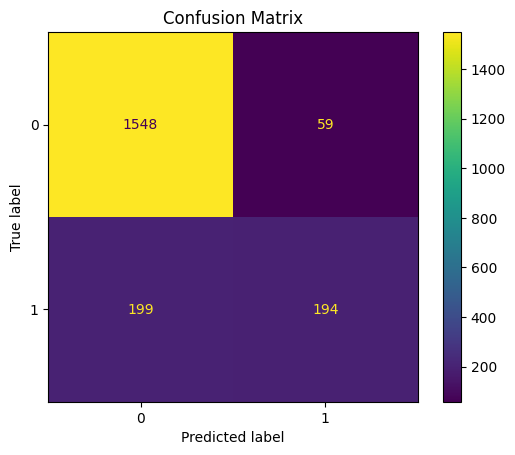

In [20]:
#Random Forest
pcm(rf_pipeline, X_val, y_val)

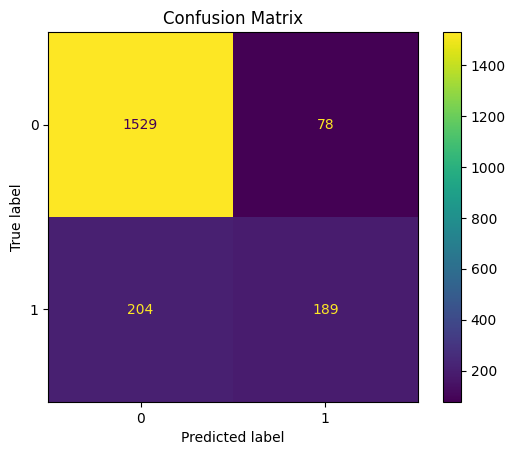

In [21]:
#Ada Boost Cla
pcm(ada_pipeline, X_val, y_val)

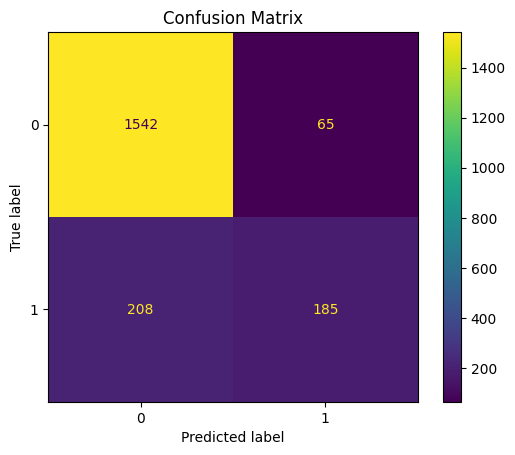

In [22]:
#Gradient Boost Classifier 

pcm(gb_pipeline, X_val, y_val)

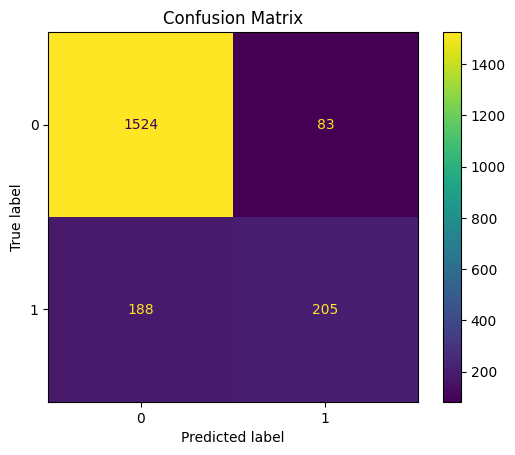

In [23]:
#XGBC Classifier 
pcm(xgb_pipeline, X_val, y_val)

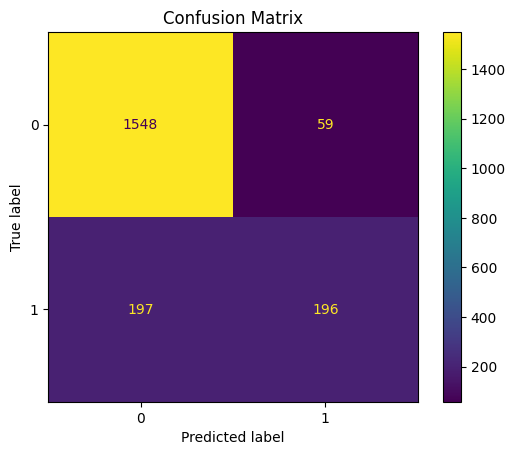

In [28]:
#Stacking Classifier
pcm(stacking_pipeline, X_val, y_val)

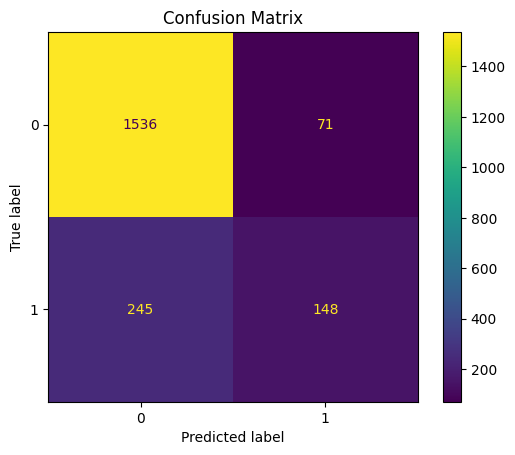

In [30]:
#Linear Regression
pcm(logreg_pipeline, X_val,y_val)

63/63 [==============================] - 0s 2ms/step


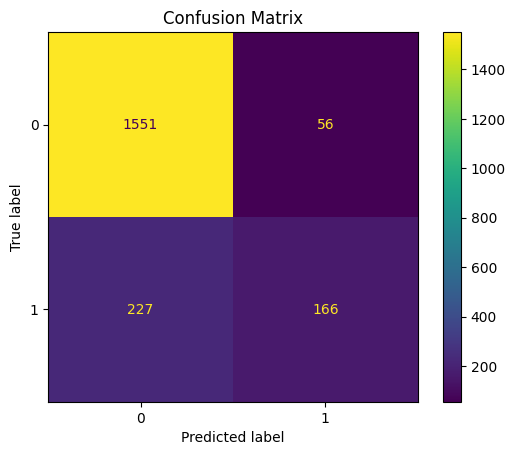

In [36]:
def plot_confusion_matrix_keras(model, X_val_processed, y_val):
    y_pred_proba = model.predict(X_val_processed)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

# Usage
plot_confusion_matrix_keras(model, X_val_processed, y_val)

**Saving the Model**

In [37]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import joblib

# Save the stacking model pipeline to a file
joblib_file = "stacking_pipeline_model.pkl"
joblib.dump(stacking_pipeline, joblib_file)
print(f"Model saved to {joblib_file}")


Model saved to stacking_pipeline_model.pkl


In [39]:
# Load the stacking model pipeline from the file
loaded_stacking_pipeline = joblib.load(joblib_file)

# Verify that the loaded model works
loaded_y_pred = loaded_stacking_pipeline.predict(X_val)
loaded_accuracy = accuracy_score(y_val, loaded_y_pred)
print(f'Loaded Stacking Model Accuracy: {loaded_accuracy:.4f}')
print('Loaded Stacking Model Classification Report:')
print(classification_report(y_val, loaded_y_pred))


Loaded Stacking Model Accuracy: 0.8720
Loaded Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.77      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



**Processing the test data**

In [41]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [45]:
# Apply Label Encoding for categorical columns in the test set
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
test_df=test
for col in categorical_columns:
    test_df[col], _ = pd.factorize(test_df[col])


# Extract features from test set
X_test = test_df[feature_columns]

# Preprocess the test data using the saved pipeline
X_test_processed = loaded_stacking_pipeline.named_steps['preprocessor'].transform(X_test)

# Make predictions using the loaded model (get probabilities)
y_test_pred_proba = loaded_stacking_pipeline.named_steps['model'].predict_proba(X_test_processed)[:, 1]

# Create a DataFrame with the ID and predicted probabilities
results = pd.DataFrame({
    'id': test_df['id'],
    'Exited': y_test_pred_proba
})

# Round the 'Exited' column to 1 decimal place
results['Exited'] = results['Exited'].round(1)

# Save the predictions to a CSV file
output_file = 'test_predictions.csv'
results.to_csv(output_file, index=False)
print(f"Predictions saved to {output_file}")

# Display the first few rows of the predictions
print(results.head())

Predictions saved to test_predictions.csv
       id  Exited
0  165034     0.1
1  165035     0.9
2  165036     0.2
3  165037     0.5
4  165038     0.9
